In [1]:
%load_ext autoreload



%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os


In [2]:
import os
GPU = ''
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]= GPU

In [3]:
from frm_dataset_loader import load_dataset
from conf_dataset_1 import *


['ook', 'ask4', 'ask8', 'bpsk', 'qpsk', 'psk8', 'psk16', 'psk32', 'apsk16', 'apsk32', 'apsk64', 'qam16', 'qam32', 'qam64', 'gmsk', 'cpfsk']


In [4]:
fname = 'datasets/test_1.dat'

(comb_test,carrier_test,clean_test,fading_test,raw_test,
         freq_test,timing_offNum_test,timing_step_test,
         coeff_test,mod_test,snr_test) = load_dataset(fname,max_sps,len(mod_list))

In [5]:
mod_test_dec = np.argmax(mod_test,-1)

In [6]:
with open(f'outputs/005.pkl','rb') as f:
    res_dpn = pickle.load(f)

In [7]:
(_,_,_,dpn_mod_dec, _,_,_,_) = res_dpn['dpn']

In [8]:
snr_list

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

/home/samer/miniconda3/envs/mod_framework/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/samer/miniconda3/envs/mod_framework/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/samer/miniconda3/envs/mod_framework/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/samer/miniconda3/envs/mod_framework/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/samer/mini

20.0


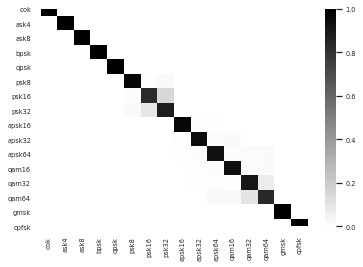

In [9]:
import sklearn
import seaborn as sn
sn.reset_orig()
import pandas as pd
from sklearn.metrics import confusion_matrix


plt.figure()

snr_value = snr_list[-1]
print (snr_value*2)
snr_test_indx_eval = np.where(snr_test == snr_value)


plt.rcParams['figure.dpi'] = 150
mat = confusion_matrix(np.argmax(mod_test,axis=-1)[snr_test_indx_eval],dpn_mod_dec[snr_test_indx_eval])
mat_20dB = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(mat_20dB, mod_list, mod_list)
#plt.figure(figsize = (10,7))
sn.set(font_scale=0.6)#for label size
sn.heatmap(df_cm,cmap='binary')# font size



sn.reset_orig()
plt.rcParams['figure.dpi'] = 150

In [10]:
snr_value

10.0

5.0


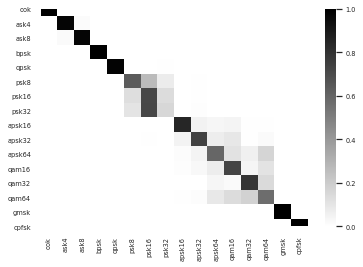

In [11]:
import sklearn
import seaborn as sn
sn.reset_orig()
import pandas as pd
from sklearn.metrics import confusion_matrix


plt.figure()

snr_value = snr_list[1]
snr_test_indx_eval = np.where(snr_test == snr_value)

print (snr_value*2)
plt.rcParams['figure.dpi'] = 150
mat = confusion_matrix(np.argmax(mod_test,axis=-1)[snr_test_indx_eval],dpn_mod_dec[snr_test_indx_eval])
mat_5dB = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(mat_5dB, mod_list, mod_list)
#plt.figure(figsize = (10,7))
sn.set(font_scale=0.6)#for label size
sn.heatmap(df_cm,cmap='binary')# font size



sn.reset_orig()
plt.rcParams['figure.dpi'] = 150